# CIFAR-10

- Course: AP4064
- Assignment: 1
- Major: ATM
- Name: Hugo ChunHo Lin
- Student Id: 109601003

### Import the package and the dataset

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
from keras import models
from keras import layers

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

2024-04-11 18:25:04.184336: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Define the DNN model architecture

In [2]:
def build_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

### Visualize the data type and the label!

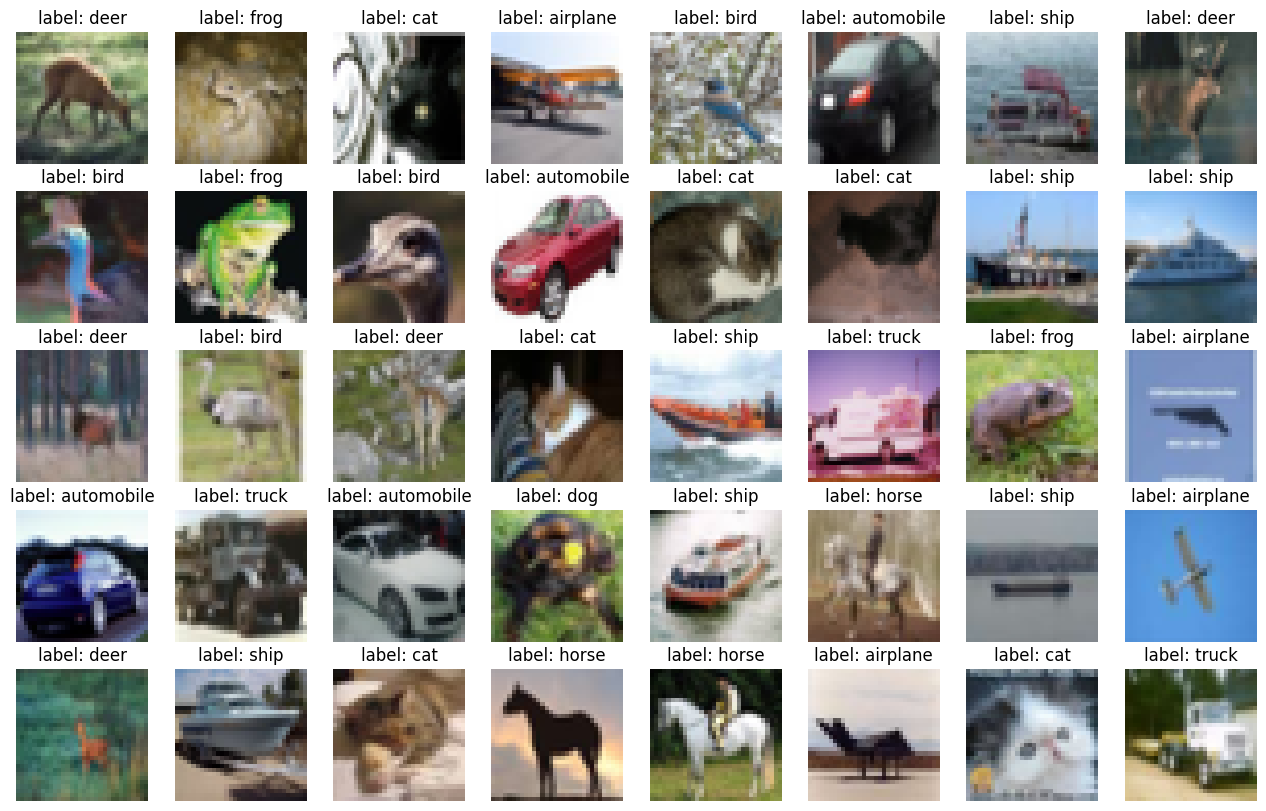

In [3]:
import matplotlib.pyplot as plt # pip install matplotlib
from random import randrange

text = ['airplane', 
        'automobile',
        'bird' ,
        'cat', 
        'deer', 
        'dog', 
        'frog', 
        'horse', 
        'ship', 
        'truck']
plt.figure(figsize=(16,10),facecolor='w')
for i in range(5):
  for j in range(8):
    index = randrange(0, 50000)
    plt.subplot(5, 8, i * 8 + j + 1)
    plt.title("label: {}".format(text[train_labels[index][0]]))
    plt.imshow(train_images[index])
    plt.axis('off')

plt.show()

In [4]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=20, 
    validation_data=(test_images, test_labels)
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2477 - loss: 2.0255 - val_accuracy: 0.3127 - val_loss: 1.8817
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3207 - loss: 1.8599 - val_accuracy: 0.3363 - val_loss: 1.8107
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3405 - loss: 1.8192 - val_accuracy: 0.3458 - val_loss: 1.7849
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3447 - loss: 1.7863 - val_accuracy: 0.3495 - val_loss: 1.7758
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3468 - loss: 1.7857 - val_accuracy: 0.3397 - val_loss: 1.8015
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3529 - loss: 1.7773 - val_accuracy: 0.3590 - val_loss: 1.7586
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3547 - loss: 1.7679 - val_accuracy: 0.3557 - val_loss: 1.7704
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3541 - loss: 1.7599 - 

In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

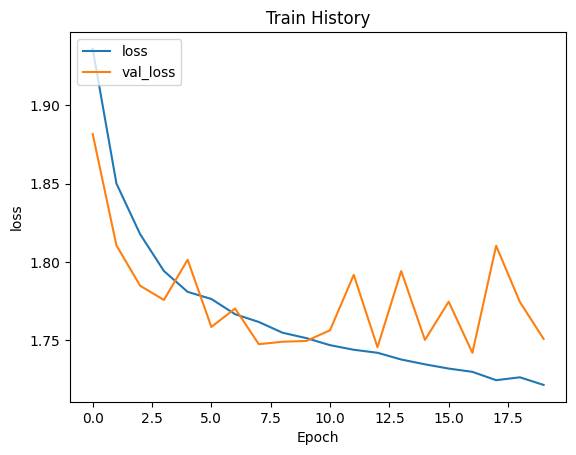

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

We find that about seven times, we can get the lowest `val_loss`, then we can re-compile our model again, and set the `epoches` to 14.

In [7]:
print('Test accuracy:', test_acc)

Test accuracy: 0.3589000105857849


### Test accuracy: 0.40779998898506165

In [8]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2662 - loss: 1.9826 - val_accuracy: 0.3766 - val_loss: 1.7384
Epoch 2/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3648 - loss: 1.7588 - val_accuracy: 0.3797 - val_loss: 1.7147
Epoch 3/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3814 - loss: 1.7082 - val_accuracy: 0.4102 - val_loss: 1.6493
Epoch 4/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3996 - loss: 1.6669 - val_accuracy: 0.4017 - val_loss: 1.6670
Epoch 5/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4027 - loss: 1.6436 - val_accuracy: 0.4021 - val_loss: 1.6497
Epoch 6/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4178 - loss: 1.6208 - val_accuracy: 0.3995 - val_loss: 1.6741
Epoch 7/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4183 - loss: 1.6125 - val_accuracy: 0.4169 - val_loss: 1.6198
Epoch 8/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4264 - loss: 1.5939 - 

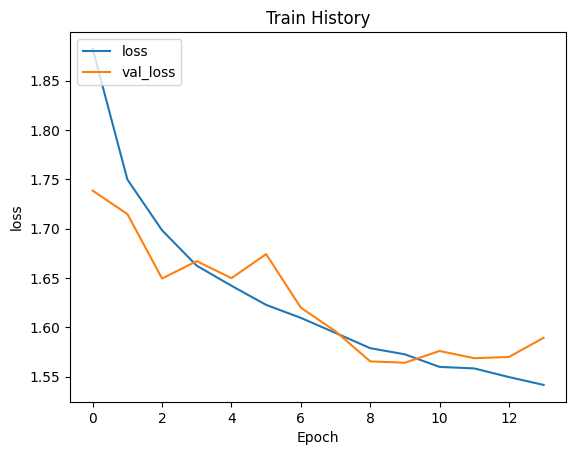

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [10]:
print('Test accuracy:', test_acc)

Test accuracy: 0.4262000024318695


### Test accuracy: 0.40549999475479126

#### The result of the test not change not much. And we set `epoches` to 7.

In [11]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=7, 
    validation_data=(test_images, test_labels),
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2506 - loss: 2.0217 - val_accuracy: 0.3391 - val_loss: 1.8180
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3461 - loss: 1.8058 - val_accuracy: 0.3603 - val_loss: 1.7653
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3553 - loss: 1.7726 - val_accuracy: 0.3297 - val_loss: 1.8400
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3674 - loss: 1.7575 - val_accuracy: 0.3781 - val_loss: 1.7054
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3730 - loss: 1.7292 - val_accuracy: 0.3827 - val_loss: 1.6984
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3832 - loss: 1.6956 - val_accuracy: 0.3767 - val_loss: 1.7028
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3861 - loss: 1.6910 - val_accuracy: 0.3852 - val_loss: 1.6946
313/313 - 0s - 764us/step - accuracy: 0.3852 - loss: 1.6946


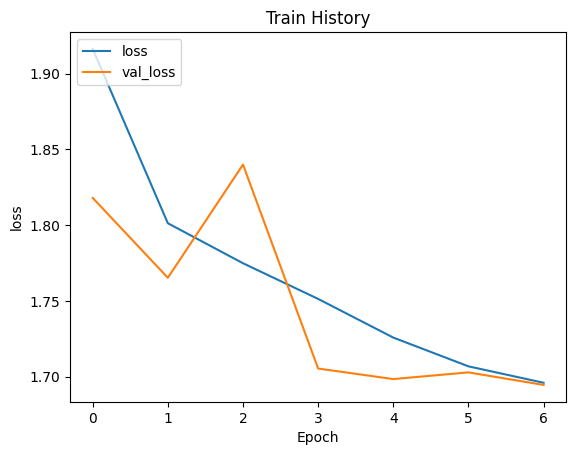

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [13]:
print('Test accuracy:', test_acc)

Test accuracy: 0.38519999384880066


We still pickup the `epoches` to 14.

#### The result of the test not change a lot!

Then we can try other variables to improve the result of our model.

### Now we add the `bastch_size`

In [14]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
    batch_size=100
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2460 - loss: 2.0380 - val_accuracy: 0.3430 - val_loss: 1.8230
Epoch 2/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3407 - loss: 1.8201 - val_accuracy: 0.3359 - val_loss: 1.8118
Epoch 3/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3525 - loss: 1.7892 - val_accuracy: 0.3658 - val_loss: 1.7528
Epoch 4/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3654 - loss: 1.7546 - val_accuracy: 0.3576 - val_loss: 1.7708
Epoch 5/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3699 - loss: 1.7436 - val_accuracy: 0.3688 - val_loss: 1.7287
Epoch 6/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3759 - loss: 1.7292 - val_accuracy: 0.3671 - val_loss: 1.7429
Epoch 7/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3737 - loss: 1.7226 - val_accuracy: 0.3813 - val_loss: 1.7084
Epoch 8/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3827 - loss: 1.7147 - val_accuracy: 0.

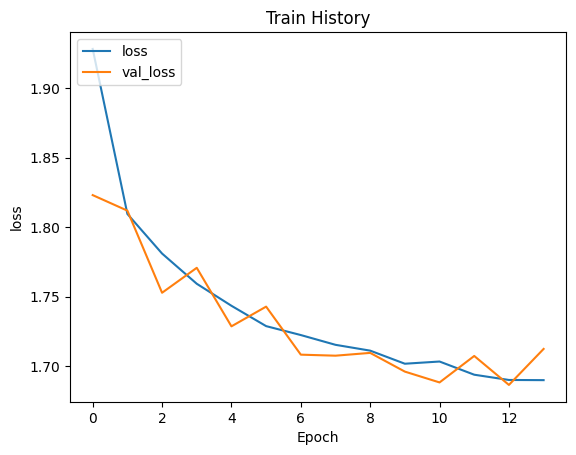

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [16]:
print('Test accuracy:', test_acc)

Test accuracy: 0.3837999999523163


#### The result of the test truly increases! Then we can find it may occur overfitting at `epoches 9` then we change the epoches


In [17]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=9, 
    validation_data=(test_images, test_labels),
    batch_size=100
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2411 - loss: 2.0500 - val_accuracy: 0.3356 - val_loss: 1.8197
Epoch 2/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3410 - loss: 1.8188 - val_accuracy: 0.3504 - val_loss: 1.7707
Epoch 3/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3522 - loss: 1.7835 - val_accuracy: 0.3636 - val_loss: 1.7475
Epoch 4/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3673 - loss: 1.7584 - val_accuracy: 0.3699 - val_loss: 1.7377
Epoch 5/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3658 - loss: 1.7577 - val_accuracy: 0.3700 - val_loss: 1.7329
Epoch 6/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3720 - loss: 1.7381 - val_accuracy: 0.3704 - val_loss: 1.7335
Epoch 7/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3713 - loss: 1.7311 - val_accuracy: 0.3822 - val_loss: 1.7135
Epoch 8/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3781 - loss: 1.7185 - val_accuracy: 0.3736 - v

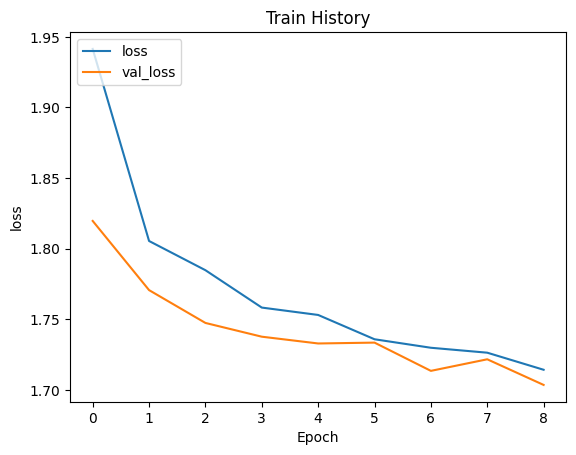

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [19]:
print('Test accuracy:', test_acc)

Test accuracy: 0.38530001044273376


#### However, the accuracy decrease, then we still set our `epoches` to 14. Now we try to increase the speed of training, we set the `batch_size` larger.

In [20]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=9, 
    validation_data=(test_images, test_labels),
    batch_size=500
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1995 - loss: 2.1549 - val_accuracy: 0.3158 - val_loss: 1.8944
Epoch 2/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3265 - loss: 1.8732 - val_accuracy: 0.3450 - val_loss: 1.8051
Epoch 3/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3521 - loss: 1.8052 - val_accuracy: 0.3595 - val_loss: 1.7715
Epoch 4/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3600 - loss: 1.7664 - val_accuracy: 0.3759 - val_loss: 1.7353
Epoch 5/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3740 - loss: 1.7327 - val_accuracy: 0.3741 - val_loss: 1.7313
Epoch 6/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3817 - loss: 1.7180 - val_accuracy: 0.3798 - val_loss: 1.7183
Epoch 7/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3891 - loss: 1.6913 - val_accuracy: 0.3942 - val_loss: 1.6885
Epoch 8/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4015 - loss: 1.6762 - val_accuracy: 0.3992 - v

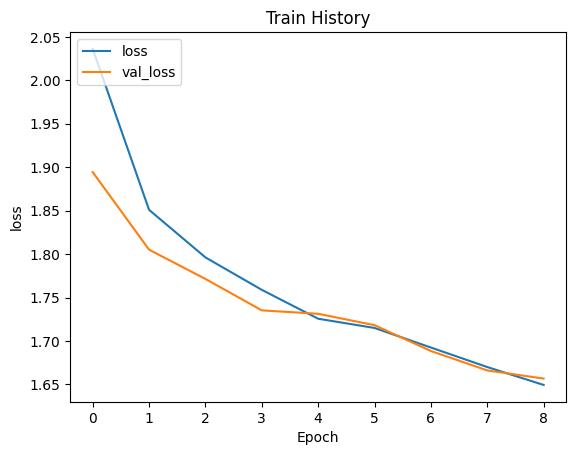

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [22]:
print('Test accuracy:', test_acc)

Test accuracy: 0.4065000116825104


#### We find that when we adjust our `batch_size` larger, we can also increase the result of our model!

### Test accuracy: 0.4408000111579895




Then we can try another test to change our `optimizer`.

In [23]:
def build_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

In [24]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
    batch_size=500
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1512 - loss: 2.2505 - val_accuracy: 0.2798 - val_loss: 1.9830
Epoch 2/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2803 - loss: 1.9803 - val_accuracy: 0.2729 - val_loss: 2.0213
Epoch 3/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3121 - loss: 1.9035 - val_accuracy: 0.3509 - val_loss: 1.8088
Epoch 4/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3374 - loss: 1.8421 - val_accuracy: 0.3365 - val_loss: 1.8456
Epoch 5/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3453 - loss: 1.8174 - val_accuracy: 0.3541 - val_loss: 1.7831
Epoch 6/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3570 - loss: 1.7910 - val_accuracy: 0.3708 - val_loss: 1.7630
Epoch 7/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3553 - loss: 1.7803 - val_accuracy: 0.3582 - val_loss: 1.7690
Epoch 8/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3654 - loss: 1.7585 - val_accuracy: 0

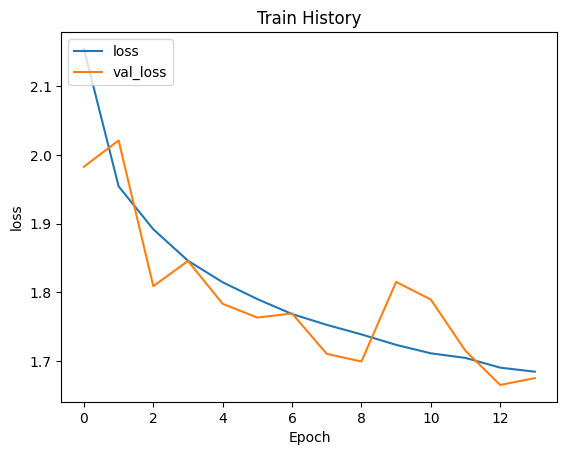

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [26]:
print('Test accuracy:', test_acc)

Test accuracy: 0.3970000147819519


### Test accuracy: 0.4668000042438507

And we found that the `val_loss` and `loss` more smoothly.

## My gained knowledge

I have tested a lot of experiment to improve the model; however, all of the results still surround to about forty percent accuracy. 

#### Below are the experiments I have conducted:
* `epoches: from 20 -> 14 -> 9 -> 14`.
* `batch_size: from 100 -> 500`.
* `optimizer: adam and rmsprop`.

Even though I designed a lot of experiments, the accuracy did not increase significantly. I have considered the reasons, and here are my conclusions. 

First, our Deep Neural-Network model was limited by the size of the CIFAR-10 dataset, which consisted of up to 50000 training_data and up to 10000 testing_data. The larger datasets made it difficult for the DNN model to capture all the necessary values during training, which resulted in less accuracy even when we changed several variables. 

Second, given the large amount of data, I could have tried to drop out the data that affected the results. However, I thought that we might be able to choose the Convolutional Neural-Network instead because it was more suitable for dropping out the worse neural in our model.

In conclusion, I am excited to have the opportunity to improve my deep-learning skills with this dataset and to review what I have learned before.

### Reference

* [Day 20 ~ AI從入門到放棄 - 新的資料集](https://ithelp.ithome.com.tw/articles/10248873)
* [簡單使用keras 架構深度學習神經網路 — 以cifar10為例](https://medium.com/@a227799770055/%E7%B0%A1%E5%96%AE%E4%BD%BF%E7%94%A8keras-%E6%9E%B6%E6%A7%8B%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-%E4%BB%A5cifar10%E7%82%BA%E4%BE%8B-b8921ca239cf)